In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data=pd.read_csv(r"C:\Users\ML Lab\Downloads\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
from sklearn.metrics import recall_score,precision_score,r2_score,mean_squared_error,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [60]:
x=data.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [61]:
y=data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model=RandomForestClassifier(n_estimators=10)

In [65]:
model.fit(x,y)

RandomForestClassifier(n_estimators=10)

In [66]:
y_pred=model.predict(x_test)
print(y_pred)
# calculating f1 score
print('F1 score:', f1_score(y_test, y_pred,average="weighted"))

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
F1 score: 0.9803330310242753


In [67]:
R2_score=r2_score(y_test,y_pred)
print("R2_score:",R2_score)
print("Accuracy:", accuracy_score(y_test,y_pred))

R2_score: 0.9081328295883874
Accuracy: 0.9805194805194806


In [68]:
RS=recall_score(y_test,y_pred)
print("Recall",RS)

Recall 0.9361702127659575


In [69]:
# Entropy(S) = -p_positive * log2(p_positive) - p_negative * log2(p_negative)
# In general, a lower entropy value indicates greater purity and less uncertainty about the classification of examples, while a higher entropy value indicates greater impurity and more uncertainty.

In [70]:
# Entropy and Gini impurity are two commonly used measures of the impurity or disorder of a set of examples in a decision tree model. Both measures are used to determine the quality of a split on a particular input feature, and are used to construct decision trees for classification problems.

# The main difference between entropy and Gini impurity is the way they calculate the impurity of a set of examples.

# Entropy measures the impurity of a set S with respect to a binary classification problem as:

# Entropy(S) = -p_positive * log2(p_positive) - p_negative * log2(p_negative)

# where p_positive is the proportion of positive examples in S, and p_negative is the proportion of negative examples in S.

# Gini impurity, on the other hand, measures the impurity of a set S as:

# Gini(S) = 1 - (p_positive)^2 - (p_negative)^2

# where p_positive and p_negative are as defined above.

# While both measures have similar properties, there are some differences that can affect the decision tree construction process:

# Calculation: Entropy involves logarithmic calculations, which can be more computationally expensive than the simpler quadratic calculation used in Gini impurity.
# Sensitivity: Gini impurity tends to be more sensitive to changes in class probabilities than entropy, meaning it may make more fine-grained splits.
# Robustness: While both measures are commonly used in practice, empirical studies have suggested that Gini impurity may be more robust to overfitting than entropy, particularly in cases where the class probabilities are unbalanced.
# In practice, the choice between entropy and Gini impurity often depends on the specific dataset and problem being considered, and may involve some trial-and-error experimentation to determine the optimal measure for a particular situation.

In [71]:
y=confusion_matrix(y_test,y_pred)
y

array([[107,   0],
       [  3,  44]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

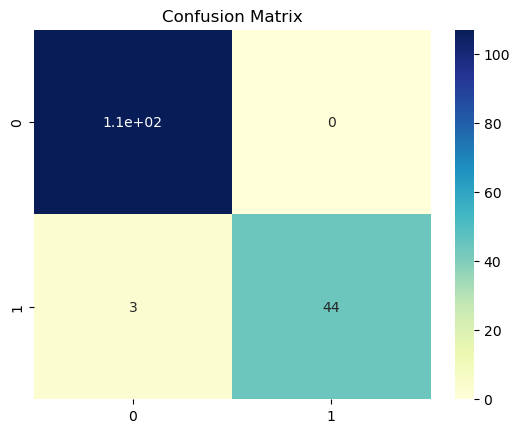

In [72]:
import seaborn as sns
sns.heatmap(y,annot=True,cmap="YlGnBu")
plt.title("Confusion Matrix")


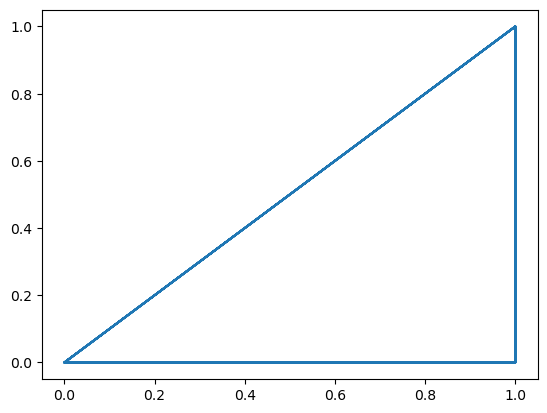

In [73]:
plt.plot(y_test,y_pred)